In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
x = boston.data[:, 5]
y = boston.target
x.shape, y.shape

((506,), (506,))

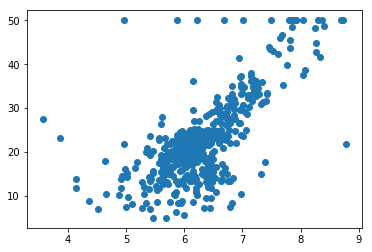

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
np.max(y)

50.0

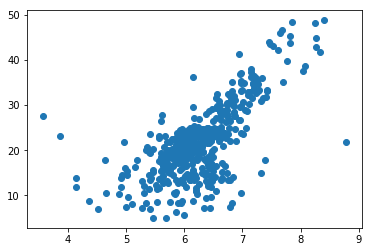

In [7]:
# 去除极值
x = x[y < 50.0]
y = y[y < 50.0]

plt.scatter(x, y)
plt.show()

### 使用我们封装的LinearReg

In [8]:
from utils.data_parser import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)
x_train.shape, y_train.shape

((392,), (392,))

In [9]:
from utils.SimpleLinearReg import SimpleLinearReg2

reg = SimpleLinearReg2()
reg.fit(x_train, y_train)

SimpleLinearReg2()

In [10]:
reg.a_, reg.b_

(7.8608543562689555, -27.459342806705543)

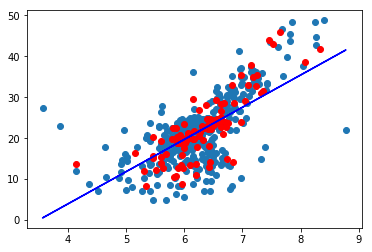

In [11]:
y_hat = reg.predict(x_train)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='r')
plt.plot(x_train, y_hat, color='b')
plt.show()

### MSE-均方误差

In [12]:
y_pred = reg.predict(x_test)

In [13]:
mse = np.sum((y_pred - y_test) ** 2) /len(y_test)
mse

24.156602134387438

### RMSE

In [14]:
from math import sqrt

rmse = np.sqrt(mse)
rmse

4.914936635846635

### MAE-绝对值误差

In [15]:
mae = np.sum(np.absolute(y_pred - y_test)) /len(y_test)
mae

3.5430974409463873

### scikit-learn中的MSE，MAE

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

24.156602134387438
3.5430974409463873


### $R^2$ / R-squared    
<img src="./imgs/R_Squared.png">  

- R^2 <= 1
- R^2 = 0，当前模型等于基准模型
- R^2 < 0，模型效果还不如基准模型，不存在线性关系
- R^2 越大越好。当模型误差越小，R^2越接近1


In [21]:
1 - mean_squared_error(y_test, y_pred) / np.var(y_test)

0.6129316803937322

In [22]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.6129316803937324